GINI INDEX

In [ ]:
def gini(a,b,c,t):
  d = 1 - (a/c)**2 - (b/c)**2
  T = ((c/t)*d)

  return d,T

In [ ]:
gini(1,4,5,5)

(0.31999999999999984, 0.31999999999999984)

GOLF WEATHER DATASET

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
path = '/gdrive/My Drive/DATA/golf_weather.csv'
data = pd.read_csv(path)
data.head()

,OUTLOOK,TEMPERATURE,HUMIDITY,WINDY,PLAY GOLF
0,Rainy,Hot,High,False,No
1,Rainy,Hot,High,True,No
2,Overcast,Hot,High,False,Yes
3,Sunny,Mild,High,False,Yes
4,Sunny,Cool,Normal,False,Yes


In [ ]:
data.shape

(14, 5)

In [ ]:
from sklearn.preprocessing import LabelEncoder

outlook_encoder = LabelEncoder()
data['OUTLOOK'] = outlook_encoder.fit_transform(data['OUTLOOK'])

temp_encoder = LabelEncoder()
data['TEMPERATURE'] = temp_encoder.fit_transform(data['TEMPERATURE'])

hum_encoder = LabelEncoder()
data['HUMIDITY'] = hum_encoder.fit_transform(data['HUMIDITY'])

wind_encoder = LabelEncoder()
data['WINDY'] = wind_encoder.fit_transform(data['WINDY'])

play_encoder = LabelEncoder()
data['PLAY GOLF'] = play_encoder.fit_transform(data['PLAY GOLF'])

data.head()

,OUTLOOK,TEMPERATURE,HUMIDITY,WINDY,PLAY GOLF
0,1,1,0,0,0
1,1,1,0,1,0
2,0,1,0,0,1
3,2,2,0,0,1
4,2,0,1,0,1


In [ ]:
y = data['PLAY GOLF']
y.head()

0    0
1    0
2    1
3    1
4    1
Name: PLAY GOLF, dtype: int64

In [ ]:
x = data.drop(columns = ['PLAY GOLF'])
x.head()

,OUTLOOK,TEMPERATURE,HUMIDITY,WINDY
0,1,1,0,0
1,1,1,0,1
2,0,1,0,0
3,2,2,0,0
4,2,0,1,0


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion = 'gini')

In [ ]:
dtree.fit(x,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
label = "PLAY GOLF"
features = x.columns
features

Index(['OUTLOOK', 'TEMPERATURE', 'HUMIDITY', 'WINDY'], dtype='object')

In [ ]:
#TO OBTAIN A PNG IMAGE

from sklearn.tree import export_graphviz
from pydotplus import graphviz as gr
from PIL import Image
from IPython.display import display

export_graphviz(dtree, out_file = 'dtree.dot', feature_names = features, class_names = label, rounded = True, precision = 1, filled = True, special_characters = True)

graph = gr.graph_from_dot_file('dtree.dot')

graph.write_png('tree.png')

True

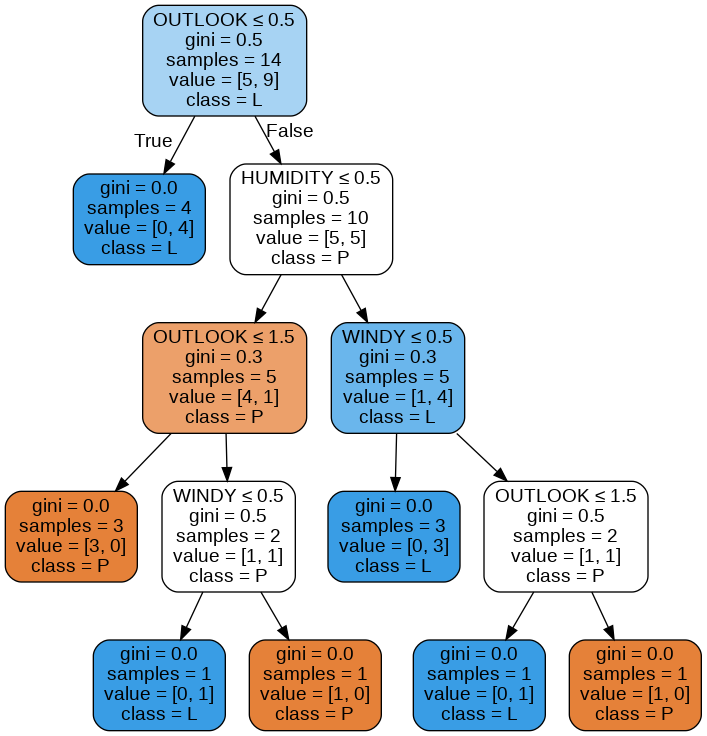

In [ ]:
#TO DISPLAY THE IMAGE

from PIL import Image
from IPython.display import display

im = Image.open('tree.png')
display(im) 

BREAST CANCER DATASET

In [ ]:
path = '/gdrive/My Drive/DATA/breast_cancer_wisconsin_data.csv'
data = pd.read_csv(path)
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
diag_encoder = LabelEncoder()
data['diagnosis'] = diag_encoder.fit_transform(data['diagnosis'])

data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
x1 = data.drop(columns = ['Unnamed: 32','id','diagnosis'])
x1.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
y1 = data['diagnosis']
y1.head()

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x1,y1,test_size=0.25,random_state=20)

In [ ]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((426, 30), (143, 30), (426,), (143,))

In [ ]:
cancer_tree = DecisionTreeClassifier(criterion='gini')
cancer_tree.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
cancer_label = 'Diagnosis'
cancer_features = x1.columns
cancer_features

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [ ]:
export_graphviz(cancer_tree, out_file = 'cancer_tree.dot', feature_names = cancer_features, class_names = cancer_label, rounded = True, precision = 1, filled = True, special_characters = True)

graph = gr.graph_from_dot_file('cancer_tree.dot')

graph.write_png('cancer_tree.png')

True

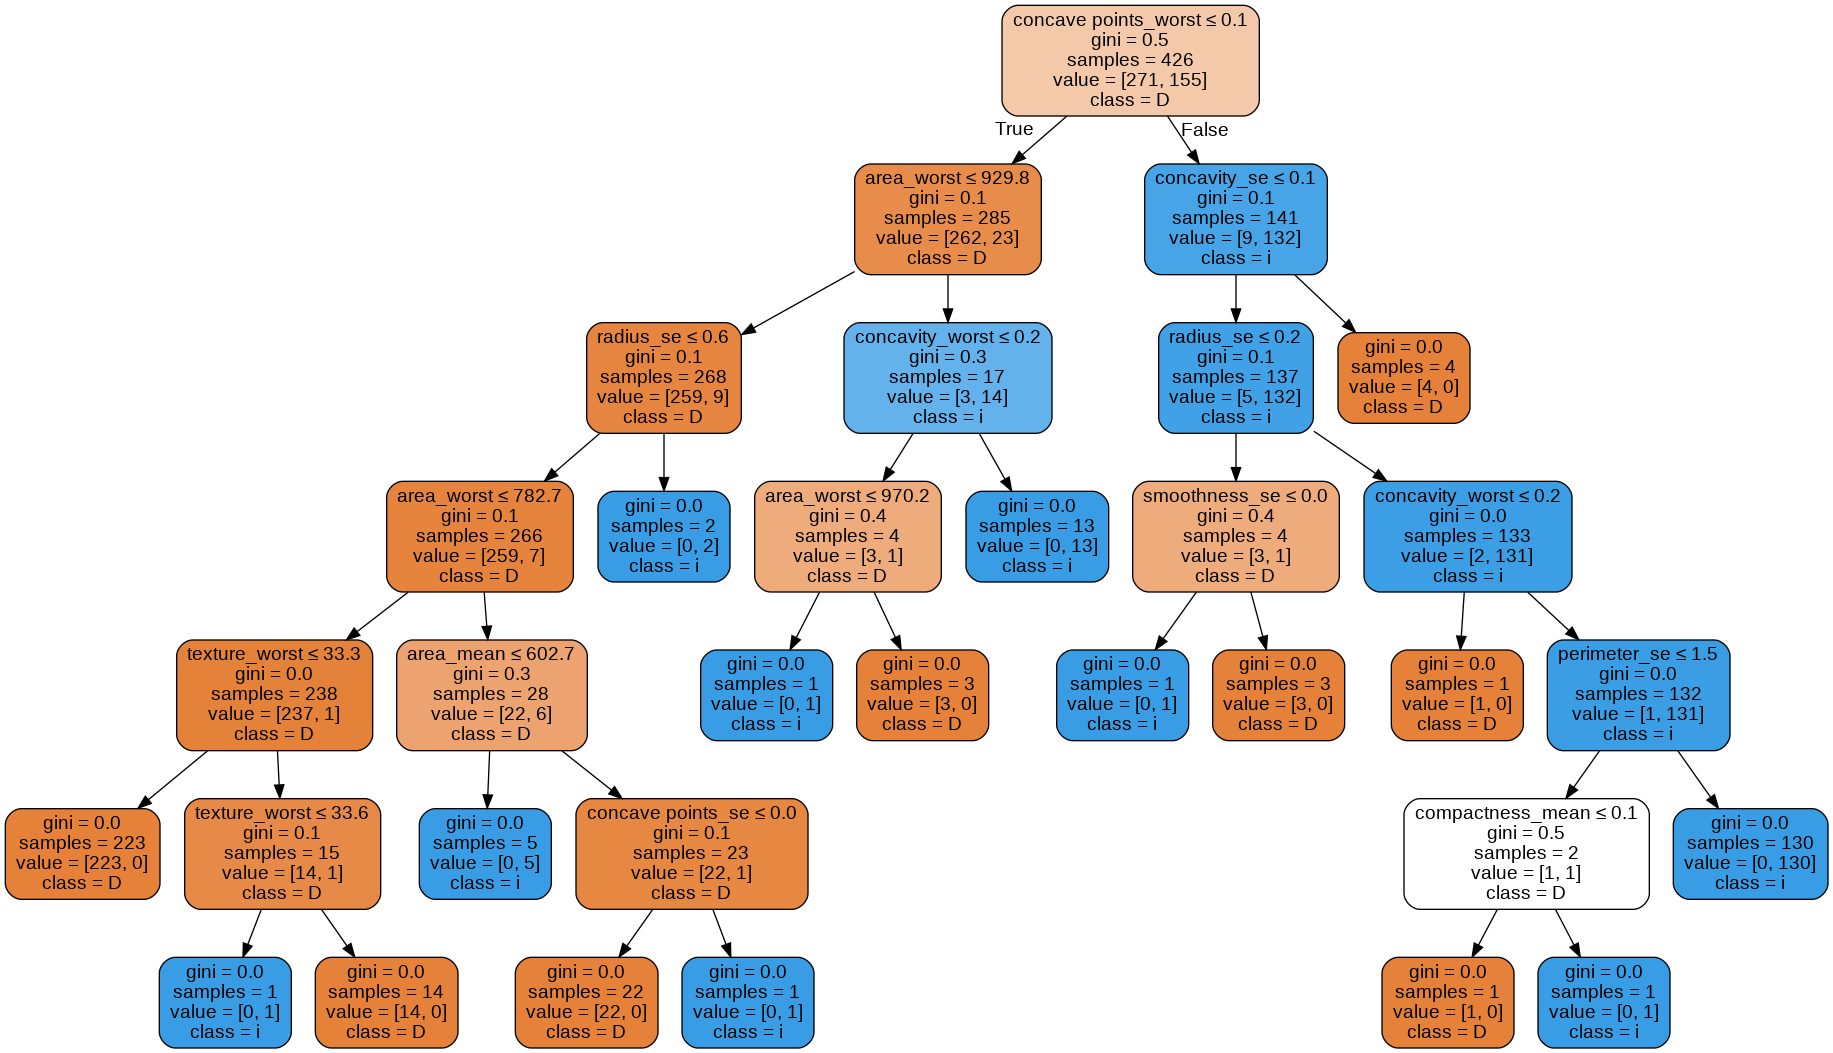

In [ ]:
im1 = Image.open('cancer_tree.png')
display(im1)

In [ ]:
ypred_train = cancer_tree.predict(x_train)
ypred_test = cancer_tree.predict(x_test)

In [ ]:
#FINDING ACCURACY

from sklearn.metrics import accuracy_score
Training_accuracy = accuracy_score(ypred_train,y_train)
Testing_accuracy = accuracy_score(y_test,ypred_test)

print('Training Accuray = {} %'.format(Training_accuracy*100))
print('Testing Accuray = {} %'.format(Testing_accuracy*100))

Training Accuray = 100.0 %
Testing Accuray = 90.20979020979021 %


In [ ]:
#CLASSIFICATION REPORT

from sklearn.metrics import classification_report
print('TRAINING DATA')
print(classification_report(y_train,ypred_train))
print('TESTING DATA')
print(classification_report(y_test,ypred_test))

TRAINING DATA
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       271
           1       1.00      1.00      1.00       155

    accuracy                           1.00       426
   macro avg       1.00      1.00      1.00       426
weighted avg       1.00      1.00      1.00       426

TESTING DATA
              precision    recall  f1-score   support

           0       0.95      0.88      0.92        86
           1       0.84      0.93      0.88        57

    accuracy                           0.90       143
   macro avg       0.90      0.91      0.90       143
weighted avg       0.91      0.90      0.90       143



In [ ]:
#TO AVOID OVEFITTING, PRUNING IS DONE

prun = cancer_tree.cost_complexity_pruning_path(x_train,y_train)
prun

{'ccp_alphas': array([0.        , 0.00232963, 0.00233755, 0.00352113, 0.00352113,
        0.00449071, 0.0045892 , 0.00807788, 0.00984786, 0.01055625,
        0.01693903, 0.04683338, 0.32410279]),
 'impurities': array([0.        , 0.00465927, 0.00933438, 0.0128555 , 0.01637663,
        0.02086734, 0.02545655, 0.03353443, 0.04338228, 0.07505102,
        0.09199005, 0.13882343, 0.46292623])}

In [ ]:
alphas = prun.ccp_alphas
print(alphas)

[0.         0.00232963 0.00233755 0.00352113 0.00352113 0.00449071
 0.0045892  0.00807788 0.00984786 0.01055625 0.01693903 0.04683338
 0.32410279]


In [ ]:
impurities = prun.impurities
print(impurities)

[0.         0.00465927 0.00933438 0.0128555  0.01637663 0.02086734
 0.02545655 0.03353443 0.04338228 0.07505102 0.09199005 0.13882343
 0.46292623]


Text(0.5, 1.0, 'total impurity Vs effective alpha for training set')

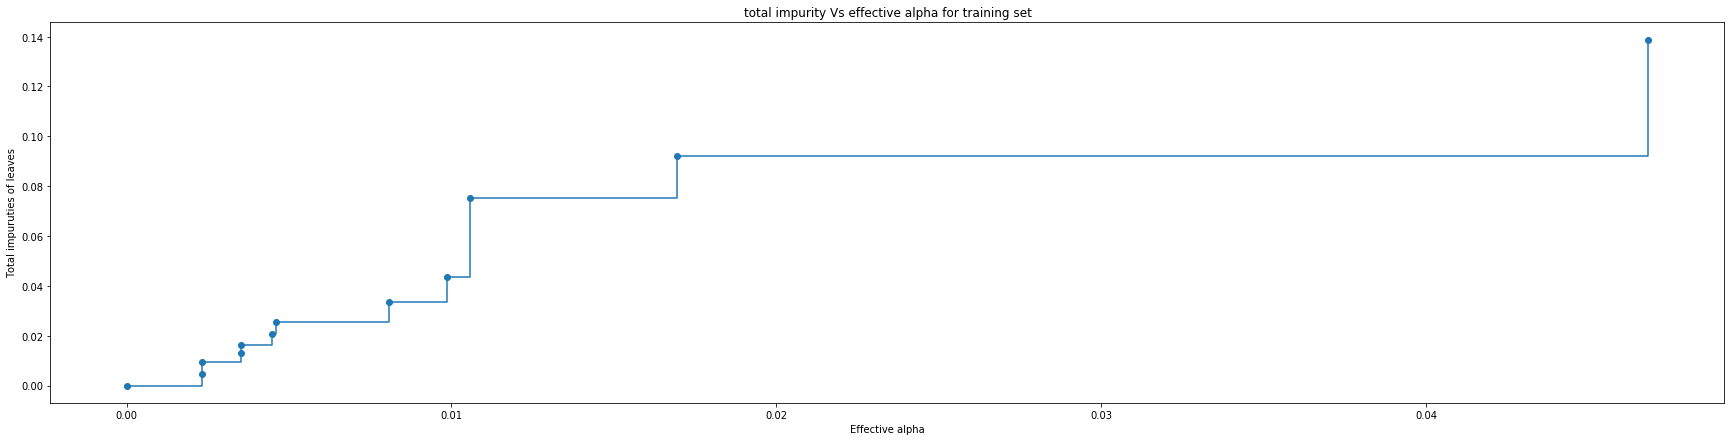

In [ ]:
fig,ax = plt.subplots(figsize=(30,7))
ax.plot(alphas[:-1],impurities[:-1],marker='o',drawstyle='steps-post')
ax.set_xlabel('Effective alpha')
ax.set_ylabel('Total impuruties of leaves')
ax.set_title('total impurity Vs effective alpha for training set')

In [ ]:
new_cancer_trees = []
i = 0

for alpha in alphas:
  new_cancer_tree = DecisionTreeClassifier(criterion='gini',ccp_alpha=alpha)
  new_cancer_tree.fit(x_train,y_train)
  new_cancer_trees.append(new_cancer_tree)

  dot_name = 'cancer_tree'+str(i)+'.dot'
  export_graphviz(new_cancer_tree, out_file = dot_name, feature_names = cancer_features, class_names = cancer_label, rounded = True, precision = 1, filled = True, special_characters = True)

  graph = gr.graph_from_dot_file(dot_name)
  png = 'cancer_tree'+str(i)+'.png'

  graph.write_png(png)
  i = i+1

In [ ]:
len(new_cancer_trees)

13

In [ ]:
node_counts = []
for i in range(len(new_cancer_trees)):

  node_counts.append(new_cancer_trees[i].tree_.node_count)
  print('Number of Node in {}th tree is {}'.format(i,new_cancer_trees[i].tree_.node_count))

Number of Node in 0th tree is 33
Number of Node in 1th tree is 29
Number of Node in 2th tree is 25
Number of Node in 3th tree is 21
Number of Node in 4th tree is 21
Number of Node in 5th tree is 19
Number of Node in 6th tree is 17
Number of Node in 7th tree is 15
Number of Node in 8th tree is 13
Number of Node in 9th tree is 7
Number of Node in 10th tree is 5
Number of Node in 11th tree is 3
Number of Node in 12th tree is 1


In [ ]:
for i in range(len(new_cancer_trees)):
  print('Number of Leaves in {}th tree is {}'.format(i,new_cancer_trees[i].get_n_leaves()))


Number of Leaves in 0th tree is 17
Number of Leaves in 1th tree is 15
Number of Leaves in 2th tree is 13
Number of Leaves in 3th tree is 11
Number of Leaves in 4th tree is 11
Number of Leaves in 5th tree is 10
Number of Leaves in 6th tree is 9
Number of Leaves in 7th tree is 8
Number of Leaves in 8th tree is 7
Number of Leaves in 9th tree is 4
Number of Leaves in 10th tree is 3
Number of Leaves in 11th tree is 2
Number of Leaves in 12th tree is 1


In [ ]:
depth = []
for i in range(len(new_cancer_trees)):
  depth.append(new_cancer_trees[i].get_depth())
  print('Depth of {}th tree is {}'.format(i,new_cancer_trees[i].get_depth())) 

Depth of 0th tree is 6
Depth of 1th tree is 6
Depth of 2th tree is 6
Depth of 3th tree is 6
Depth of 4th tree is 6
Depth of 5th tree is 5
Depth of 6th tree is 5
Depth of 7th tree is 5
Depth of 8th tree is 5
Depth of 9th tree is 2
Depth of 10th tree is 2
Depth of 11th tree is 1
Depth of 12th tree is 0


In [ ]:
node_counts

[33, 29, 25, 21, 21, 19, 17, 15, 13, 7, 5, 3, 1]

In [ ]:
depth

[6, 6, 6, 6, 6, 5, 5, 5, 5, 2, 2, 1, 0]

Text(0.5, 1.0, 'Depth Vs Alpha')

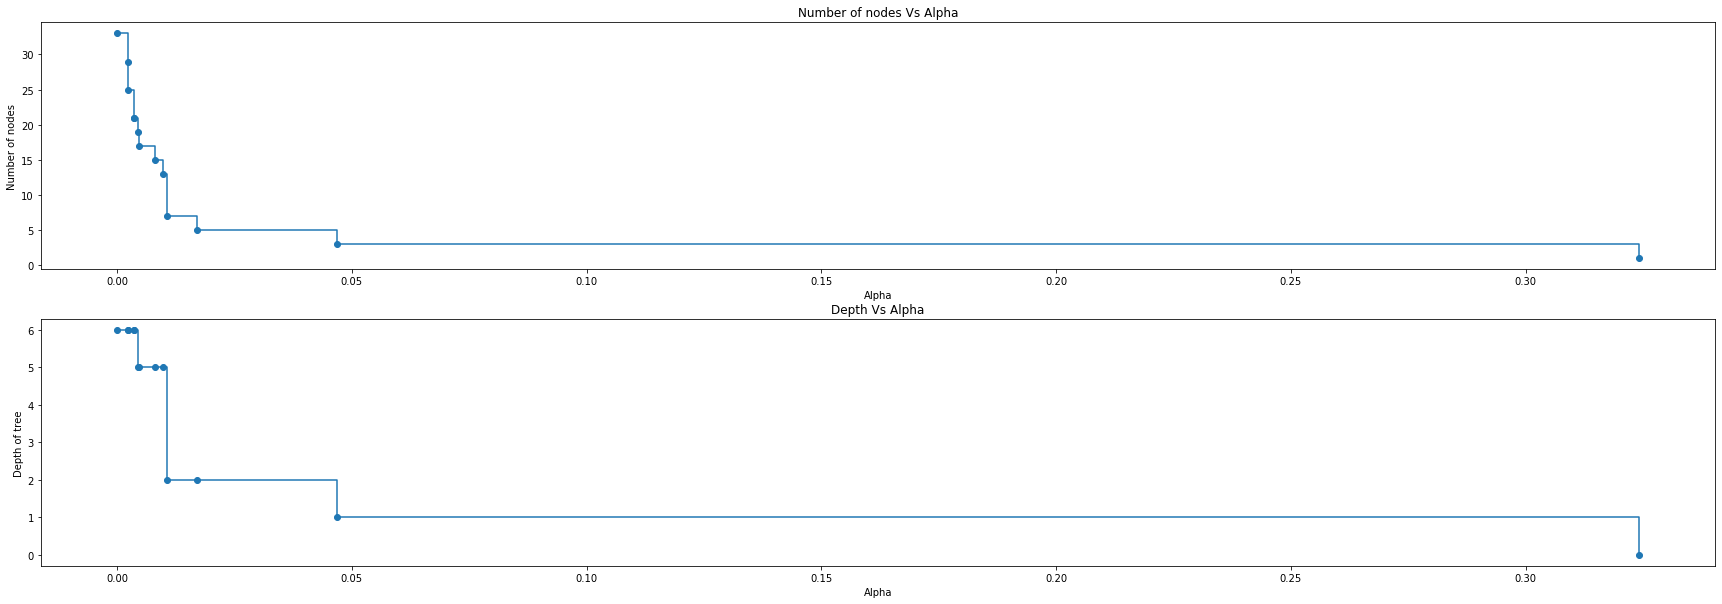

In [ ]:
fig,ax = plt.subplots(2,1,figsize=(30,10))

ax[0].plot(alphas,node_counts,marker='o',drawstyle='steps-post')
ax[0].set_xlabel('Alpha')
ax[0].set_ylabel('Number of nodes')
ax[0].set_title('Number of nodes Vs Alpha')

ax[1].plot(alphas,depth,marker='o',drawstyle='steps-post')
ax[1].set_xlabel('Alpha')
ax[1].set_ylabel('Depth of tree')
ax[1].set_title('Depth Vs Alpha')

In [ ]:
train_scores = [new_cancer_tree.score(x_train,y_train) for new_cancer_tree in new_cancer_trees]
print(train_scores)

print('Max. F1 train_score = {}'.format(max(train_scores)))
print('Position of train max. F1 = {}'.format(np.argmax(train_scores)))

[1.0, 0.9976525821596244, 0.9953051643192489, 0.9906103286384976, 0.9906103286384976, 0.9882629107981221, 0.9859154929577465, 0.9812206572769953, 0.9765258215962441, 0.960093896713615, 0.9507042253521126, 0.9248826291079812, 0.636150234741784]
Max. F1 train_score = 1.0
Position of train max. F1 = 0


In [ ]:
#TO FIND THE BEST PURNED TREE

test_scores = [new_cancer_tree.score(x_test,y_test) for new_cancer_tree in new_cancer_trees]
print(test_scores)

print('Max. F1 test_score = {}'.format(max(test_scores)))
print('Position of test max. F1 = {}'.format(np.argmax(test_scores)))

[0.9020979020979021, 0.8881118881118881, 0.9090909090909091, 0.8951048951048951, 0.8951048951048951, 0.9020979020979021, 0.8951048951048951, 0.9090909090909091, 0.9090909090909091, 0.9370629370629371, 0.9370629370629371, 0.9020979020979021, 0.6013986013986014]
Max. F1 test_score = 0.9370629370629371
Position of test max. F1 = 9


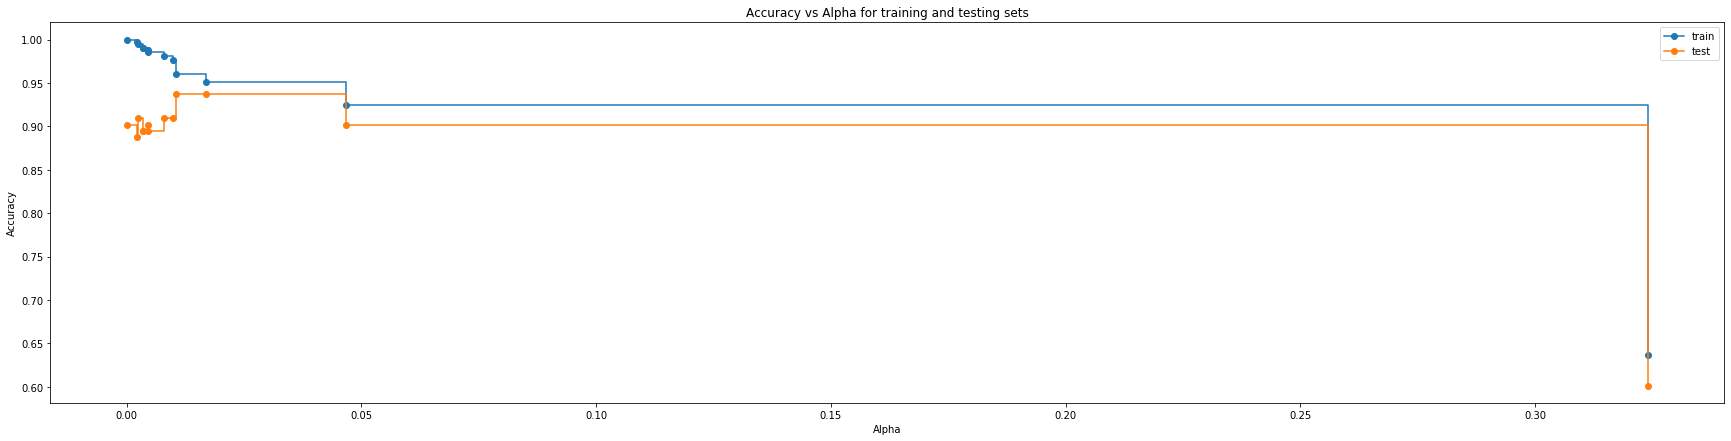

In [ ]:
#VISUALISATION OF BEST PURNED TREE

fig,ax = plt.subplots(figsize=(30,7))
ax.set_xlabel('Alpha')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy vs Alpha for training and testing sets')
ax.plot(alphas,train_scores,marker='o',label='train',drawstyle='steps-post')
ax.plot(alphas,test_scores,marker='o',label='test',drawstyle='steps-post')
ax.legend()
plt.show()

In [ ]:
#APPLYING THE BEST PRUNED TREE IN THE MODEL

pruned_cancer_tree = DecisionTreeClassifier(criterion = 'gini',ccp_alpha = alphas[9])
pruned_cancer_tree.fit(x_train,y_train)
new_ypred_train = pruned_cancer_tree.predict(x_train)
new_ypred_test = pruned_cancer_tree.predict(x_test)

In [ ]:
#FINDING ACCURACY

from sklearn.metrics import accuracy_score
Training_accuracy = accuracy_score(y_train,new_ypred_train)
Testing_accuracy = accuracy_score(y_test,new_ypred_test)

print('Training Accuray = {} %'.format(Training_accuracy*100))
print('Testing Accuray = {} %'.format(Testing_accuracy*100))

Training Accuray = 96.0093896713615 %
Testing Accuray = 93.7062937062937 %


In [ ]:
#CLASSIFICATION REPORT

from sklearn.metrics import classification_report
print('TRAINING DATA')
print(classification_report(y_train,new_ypred_train))
print('TESTING DATA')
print(classification_report(y_test,new_ypred_test))

TRAINING DATA
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       271
           1       0.95      0.94      0.94       155

    accuracy                           0.96       426
   macro avg       0.96      0.96      0.96       426
weighted avg       0.96      0.96      0.96       426

TESTING DATA
              precision    recall  f1-score   support

           0       0.96      0.93      0.95        86
           1       0.90      0.95      0.92        57

    accuracy                           0.94       143
   macro avg       0.93      0.94      0.93       143
weighted avg       0.94      0.94      0.94       143

